### Homework6

In [138]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [139]:
df_url='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
df=pd.read_csv(df_url)


In [140]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [141]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

**Fill NAs with 0**



In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [143]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [144]:
df=df.fillna(0)

In [145]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

**Apply the log tranform to median_house_value**



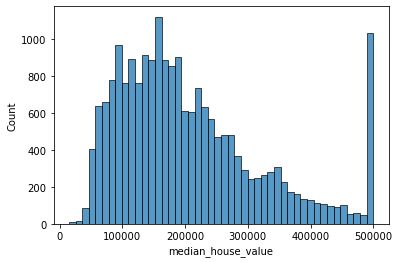

In [146]:
sns.histplot(df['median_house_value']);

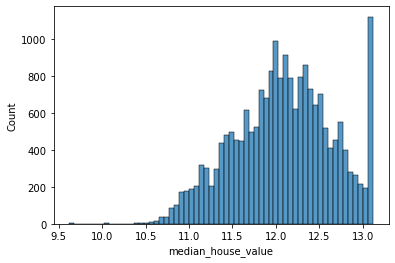

In [147]:
df['median_house_value']=np.log1p(df['median_house_value'])
sns.histplot(df['median_house_value']);

**Do train/validation/test split with 60%/20%/20% distribution**

**Use the train_test_split function and set the random_state parameter to 1**

**Use DictVectorizer to turn the dataframe into matrices**





In [148]:
df_train_full,df_test=train_test_split(df,test_size=0.20,random_state=1)
df_train,df_val=train_test_split(df_train_full,test_size=0.25,random_state=1)

**Question 1**
Let's train a decision tree regressor to predict the median_house_value variable.

Train a model with max_depth=1.
Which feature is used for splitting the data?

ocean_proximity=INLAND
total_rooms
latitude
population


In [149]:
y_train = (df_train.median_house_value).values
y_val = (df_val.median_house_value).values
y_test = (df_test.median_house_value).values

In [150]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [151]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9107,-118.18,34.63,19.0,3562.0,606.0,1677.0,578.0,4.1573,INLAND
13999,-116.90,34.69,10.0,337.0,102.0,108.0,50.0,0.4999,INLAND
5610,-118.26,33.78,27.0,1672.0,491.0,1723.0,462.0,2.0458,NEAR OCEAN
13533,-117.33,34.17,5.0,4718.0,1140.0,2564.0,1056.0,2.9877,INLAND
2953,-119.02,35.35,42.0,1239.0,251.0,776.0,272.0,1.9830,INLAND
...,...,...,...,...,...,...,...,...,...
4482,-118.19,34.06,32.0,555.0,159.0,748.0,163.0,1.9762,<1H OCEAN
1835,-122.30,37.90,37.0,2125.0,489.0,912.0,462.0,2.9219,NEAR BAY
8539,-118.36,33.90,18.0,3380.0,922.0,2276.0,854.0,4.0727,<1H OCEAN
2155,-119.79,36.78,41.0,2227.0,462.0,1129.0,415.0,2.3190,INLAND


In [152]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [153]:
X_train[1]

array([  50.    ,   10.    ,   34.69  , -116.9   ,    0.4999,    0.    ,
          1.    ,    0.    ,    0.    ,    0.    ,  108.    ,  102.    ,
        337.    ])

In [154]:
#


In [155]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [156]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



**Which feature is used for splitting the data?**

Answer: ocean_proximity=INLAND

**Question 2**
Train a random forest model with these parameters:

n_estimators=10

random_state=1 

n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?


0.05
0.25
0.55
0.85

In [157]:
rf = RandomForestRegressor(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=1)

In [158]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [159]:
y_pred = rf.predict(X_val)

    

In [160]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)).round(2))

RMSE: 0.25


**Question 3**

Now, let's experiment with the n_estimators parameter.

Try different values of this parameter from 10 to 200 with step 10.

Set random_state to 1.

Evaluate the model on the validation dataset.

In [161]:
score=[]
for i in range(10,201,10):
    rf = RandomForestRegressor(n_estimators=i, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred)).round(2))

In [162]:
score

[0.25,
 0.24,
 0.24,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23,
 0.23]

**After which value of n_estimators does RMSE stop improving?**

Answer: 10

**Question 4**

Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25].
    
For each of these values, try different values of n_estimators from 10 till 200 (with step 10).

Fix the random seed: random_state=1.

In [163]:
score=[]
for i in range(10,30,5):
    rf = RandomForestRegressor(n_estimators=10,max_depth=i, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred)).round(2))

In [164]:
score

[0.26, 0.24, 0.25, 0.25]

In [165]:
scores = []

for d in [10, 15, 20,25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rms= np.sqrt(metrics.mean_squared_error(y_val, y_pred)).round(2)

        scores.append((d, n,  rms))

In [166]:
columns = ['max_depth', 'n_estimators', 'rms']
df_scores = pd.DataFrame(scores, columns=columns)

In [169]:
df_scores.tail()

,max_depth,n_estimators,rms
75,25,160,0.23
76,25,170,0.23
77,25,180,0.23
78,25,190,0.23
79,25,200,0.23


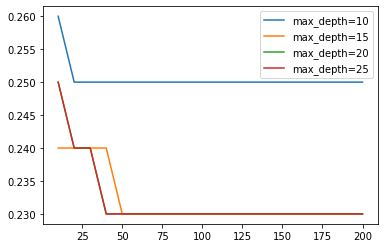

In [170]:
for d in [10, 15, 20,25]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rms,
             label='max_depth=%d' % d)

plt.legend()


Answer: max_depth=25

**Question 5**

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parametes:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)
Get the feature importance information from this model
What's the most important feature?

total_rooms
median_income
total_bedrooms
longitude


In [171]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, random_state=1)

In [172]:
rf.feature_importances_

array([1.69573183e-02, 3.30938997e-02, 1.01333971e-01, 9.62649876e-02,
       3.62912907e-01, 3.00723750e-03, 3.10900842e-01, 3.56806263e-04,
       4.48661972e-04, 4.22762446e-03, 3.09180197e-02, 1.90412562e-02,
       2.05364687e-02])

In [175]:
feature_importances = pd.DataFrame(rf.feature_importances_,columns=['importance']).sort_values('importance', ascending=False)

In [176]:
feature_importances

,importance
4,0.362913
6,0.310901
2,0.101334
3,0.096265
1,0.033094
10,0.030918
12,0.020536
11,0.019041
0,0.016957
9,0.004228


**What's the most important feature?**

total_rooms

median_income

total_bedrooms

longitude


Answer: total_rooms

**Question 6**


Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

Install XGBoost
Create DMatrix for train and validation
Create a watchlist
Train a model with these parameters for 100 rounds:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
Now change eta first to 0.1 and then to 0.01

Which eta leads to the best RMSE score on the validation dataset?

0.3
0.1
Both gives same

In [177]:
import xgboost as xgb


In [178]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [179]:
watchlist = [(dtrain, 'train'), (dval, 'val')]
watchlist

[(<xgboost.core.DMatrix at 0x276dca24bb0>, 'train'),
 (<xgboost.core.DMatrix at 0x276dc8e3220>, 'val')]

In [180]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,evals=watchlist)


[0]	train-rmse:8.12733	val-rmse:8.13245
[1]	train-rmse:5.69586	val-rmse:5.70070
[2]	train-rmse:3.99540	val-rmse:4.00041
[3]	train-rmse:2.80712	val-rmse:2.81079
[4]	train-rmse:1.97834	val-rmse:1.98175
[5]	train-rmse:1.40218	val-rmse:1.40741
[6]	train-rmse:1.00099	val-rmse:1.00700
[7]	train-rmse:0.72751	val-rmse:0.73439
[8]	train-rmse:0.54190	val-rmse:0.55047
[9]	train-rmse:0.42167	val-rmse:0.43233
[10]	train-rmse:0.34481	val-rmse:0.35782
[11]	train-rmse:0.29835	val-rmse:0.31360
[12]	train-rmse:0.27095	val-rmse:0.28865
[13]	train-rmse:0.25268	val-rmse:0.27334
[14]	train-rmse:0.24295	val-rmse:0.26605
[15]	train-rmse:0.23555	val-rmse:0.26044
[16]	train-rmse:0.22630	val-rmse:0.25229
[17]	train-rmse:0.22233	val-rmse:0.24902
[18]	train-rmse:0.22029	val-rmse:0.24826
[19]	train-rmse:0.21791	val-rmse:0.24696
[20]	train-rmse:0.21580	val-rmse:0.24624
[21]	train-rmse:0.21160	val-rmse:0.24334
[22]	train-rmse:0.20975	val-rmse:0.24245
[23]	train-rmse:0.20904	val-rmse:0.24269
[24]	train-rmse:0.20703	va

In [181]:
y_pred = model.predict(dval)
np.sqrt(metrics.mean_squared_error(y_val, y_pred)).round(2)


0.23

In [182]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,evals=watchlist)



[0]	train-rmse:10.44372	val-rmse:10.44938
[1]	train-rmse:9.40118	val-rmse:9.40684
[2]	train-rmse:8.46290	val-rmse:8.46831
[3]	train-rmse:7.61859	val-rmse:7.62391
[4]	train-rmse:6.85878	val-rmse:6.86368
[5]	train-rmse:6.17513	val-rmse:6.17987
[6]	train-rmse:5.55994	val-rmse:5.56437
[7]	train-rmse:5.00643	val-rmse:5.01061
[8]	train-rmse:4.50846	val-rmse:4.51264
[9]	train-rmse:4.06043	val-rmse:4.06461
[10]	train-rmse:3.65741	val-rmse:3.66135
[11]	train-rmse:3.29492	val-rmse:3.29877
[12]	train-rmse:2.96894	val-rmse:2.97284
[13]	train-rmse:2.67573	val-rmse:2.67979
[14]	train-rmse:2.41195	val-rmse:2.41587
[15]	train-rmse:2.17500	val-rmse:2.17928
[16]	train-rmse:1.96214	val-rmse:1.96662
[17]	train-rmse:1.77065	val-rmse:1.77536
[18]	train-rmse:1.59880	val-rmse:1.60396
[19]	train-rmse:1.44376	val-rmse:1.44910
[20]	train-rmse:1.30499	val-rmse:1.31054
[21]	train-rmse:1.18080	val-rmse:1.18646
[22]	train-rmse:1.06879	val-rmse:1.07469
[23]	train-rmse:0.96912	val-rmse:0.97546
[24]	train-rmse:0.87914	

In [183]:
y_pred = model.predict(dval)
np.sqrt(metrics.mean_squared_error(y_val, y_pred)).round(2)

0.23

In [184]:
xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100,evals=watchlist)
y_pred = model.predict(dval)
np.sqrt(metrics.mean_squared_error(y_val, y_pred)).round(2)


[0]	train-rmse:11.48634	val-rmse:11.49225
[1]	train-rmse:11.37165	val-rmse:11.37753
[2]	train-rmse:11.25810	val-rmse:11.26397
[3]	train-rmse:11.14569	val-rmse:11.15153
[4]	train-rmse:11.03441	val-rmse:11.04022
[5]	train-rmse:10.92424	val-rmse:10.93003
[6]	train-rmse:10.81516	val-rmse:10.82094
[7]	train-rmse:10.70718	val-rmse:10.71290
[8]	train-rmse:10.60029	val-rmse:10.60598
[9]	train-rmse:10.49446	val-rmse:10.50009
[10]	train-rmse:10.38969	val-rmse:10.39532
[11]	train-rmse:10.28597	val-rmse:10.29160
[12]	train-rmse:10.18328	val-rmse:10.18889
[13]	train-rmse:10.08163	val-rmse:10.08723
[14]	train-rmse:9.98099	val-rmse:9.98657
[15]	train-rmse:9.88136	val-rmse:9.88695
[16]	train-rmse:9.78273	val-rmse:9.78832
[17]	train-rmse:9.68508	val-rmse:9.69063
[18]	train-rmse:9.58841	val-rmse:9.59394
[19]	train-rmse:9.49270	val-rmse:9.49823
[20]	train-rmse:9.39796	val-rmse:9.40346
[21]	train-rmse:9.30416	val-rmse:9.30966
[22]	train-rmse:9.21131	val-rmse:9.21680
[23]	train-rmse:9.11938	val-rmse:9.1248

4.26